# 5.　偏相関

## 5.1　もうひとつの相関

- URL : http://kogolab.chillout.jp/elearn/icecream/chap5/sec1.html
- テーマ
   1. 復習
       - 相関係数算出
       - 散布図作成
       - 無相関検定
       - 散布図行列
       - 相関係数の全組み合わせ算出

r_val =  0.301911578016
p_val =  0.195771802101


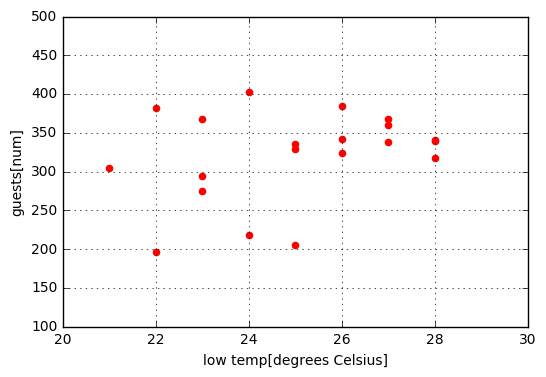

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import lines
import matplotlib.pyplot as plt
from scipy import stats
import math

# csvからデータの読み込み
df_1 = pd.read_csv('./data/chapter5-1.csv')

# 散布図を各
plt.xlim([20, 30])
plt.ylim([100, 500])
plt.xlabel('low temp[degrees Celsius]')
plt.ylabel('guests[num]')
plt.grid()
plt.scatter(df_1.low_temp, df_1.guests, marker="o", color="red")

# 相関係数とp値を求める
#df_1.corr().low_temp.guests
corr_list_1 = stats.pearsonr(df_1.low_temp, df_1.guests)
print('r_val = ', corr_list_1[0])
print('p_val = ', corr_list_1[1])

,num,high_temp,low_temp,guests
num,1.000000,-0.336657,-0.318832,-0.133160
high_temp,-0.336657,1.000000,0.705832,0.870352
low_temp,-0.318832,0.705832,1.000000,0.301912
guests,-0.133160,0.870352,0.301912,1.000000


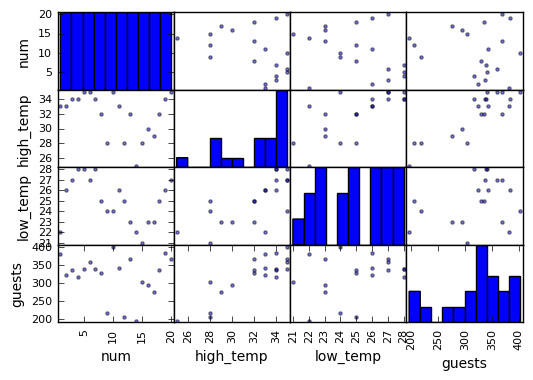

In [3]:
# 散布図行列を書く
pd.tools.plotting.scatter_matrix(df_1)
df_1.corr()

## 5.2　偏相関とは

- URL : http://kogolab.chillout.jp/elearn/icecream/chap5/sec2.html
- テーマ
   1. 読み物オンリーページ
       - AとBの相関を見たいが、このときCの影響も含まれてしまうとき、このCの影響を除外したAとBの相関を偏相関という
       - 見たい相関以外の影響を除外するときに使用する
       - 「疑似相関」「統計的消去」あたりもネットで調べてみる
       
## 5.3　偏相関係数を求める

- URL : http://kogolab.chillout.jp/elearn/icecream/chap5/sec3.html
- テーマ
   1. 偏相関係数の算出
       - 関数作って使いまわしたい
       - データフレームと、相関みたい要素と、影響を除外したい要素を入力する感じ

In [20]:
# 読み込んだデータから"num"列を削除する(使わないため)
df_2 = df_1.drop("num", axis=1)

# 相関係数を求める(行列)
df_2_corr = df_2.corr()

# 偏相関係数算出用関数
# calc_partial_corr(データフレーム, 相関見たい要素1, 相関見たい要素2, 影響を除外したい要素)
def calc_partial_corr(df, x, y, a):
    xy_corr = df.corr()[x][y]
    xa_corr = df.corr()[x][a]
    ya_corr = df.corr()[y][a]
    p_corr  = (xy_corr - (ya_corr * xa_corr)) / ((math.sqrt(1 - ya_corr**2)) * (math.sqrt(1 - xa_corr**2)))
    return p_corr

partial_corr_1 = calc_partial_corr(df_2, 'low_temp', 'guests', 'high_temp')
partial_corr_2 = calc_partial_corr(df_2, 'high_temp', 'low_temp', 'guests')
partial_corr_3 = calc_partial_corr(df_2, 'guests', 'high_temp', 'low_temp')

print('partial_corr : low_temp vs guests    (-hith_temp)  = ', partial_corr_1)
print('partial_corr : high_temp vs low_temp (-guests)     = ', partial_corr_2)
print('partial_corr : guests vs high_temp   (-low_temp)   = ', partial_corr_3)

partial_corr : low_temp vs guests    (-hith_temp)  =  -0.895600384086
partial_corr : high_temp vs low_temp (-guests)     =  0.943786916971
partial_corr : guests vs high_temp   (-low_temp)   =  0.973241417995


## 5.4　もうひとつの偏相関係数

- URL : http://kogolab.chillout.jp/elearn/icecream/chap5/sec4.html
- テーマ
   1. 偏相関係数の算出
       - 1つ上で全通りの偏相関係数を関数で求めたので、ここは省略
       
## 5.5　偏相関再び

- URL : http://kogolab.chillout.jp/elearn/icecream/chap5/sec5.html
- テーマ
   1. 読み物オンリーページ
       - 偏相関について、グラフを使って別の角度から説明
       
## 5.6　通過テスト

- URL : http://kogolab.chillout.jp/elearn/icecream/chap5/sec6.html
- テーマ
   1. 偏相関係数の算出
       - 作った関数でサクッと算出する

In [23]:
# csvからデータの読み込み
df_3 = pd.read_csv('./data/chapter5-6.csv')

# 偏相関係数算出
p_corr_1 = calc_partial_corr(df_3, 'score', 'grade', 'ave')
p_corr_2 = calc_partial_corr(df_3, 'ave', 'score', 'grade')
p_corr_3 = calc_partial_corr(df_3, 'grade', 'ave', 'score')

# 表示
print('partial_corr : score vs grade (-ave)  = ', p_corr_1)
print('partial_corr : ave vs score (-grade)  = ', p_corr_2)
print('partial_corr : grade vs ave (-score)  = ', p_corr_3)

df_3.corr()

partial_corr : score vs grade (-ave)  =  0.595870462931
partial_corr : ave vs score (-grade)  =  0.443516772772
partial_corr : grade vs ave (-score)  =  0.172786224931


,num,score,grade,ave
num,1.000000,0.976106,0.784549,0.700524
score,0.976106,1.000000,0.761798,0.690864
grade,0.784549,0.761798,1.000000,0.607225
ave,0.700524,0.690864,0.607225,1.000000
